# Machine Learning Introduction Workshop

## Installation Instructions
1. conda create --name kampal python=3
2. source activate kampal
3. conda install notebook
4. conda install scikit-learn
5. conda install seaborn
6. pip install beautifulsoup4
7. mkdir data

## Loading Email Data

In [58]:
!curl 'http://www.aueb.gr/users/ion/data/enron-spam/raw/ham/beck-s.tar.gz' > data/beck-s.tar.gz
!curl 'http://www.aueb.gr/users/ion/data/enron-spam/raw/ham/farmer-d.tar.gz' > data/farmer-d.tar.gz
!curl 'http://www.aueb.gr/users/ion/data/enron-spam/raw/ham/kaminski-v.tar.gz' > data/kaminski-v.tar.gz
!curl 'http://www.aueb.gr/users/ion/data/enron-spam/raw/ham/kitchen-l.tar.gz' > data/kitchen-l.tar.gz
!curl 'http://www.aueb.gr/users/ion/data/enron-spam/raw/ham/lokay-m.tar.gz' > data/lokay-m.tar.gz
!curl 'http://www.aueb.gr/users/ion/data/enron-spam/raw/ham/williams-w3.tar.gz' > data/williams-w3.tar.gz
!curl 'https://spamassassin.apache.org/publiccorpus/20030228_spam.tar.bz2' > data/20030228_spam.tar.bz2
!curl 'https://spamassassin.apache.org/publiccorpus/20021010_easy_ham.tar.bz2' > data/20021010_easy_ham.tar.bz2
!curl 'https://spamassassin.apache.org/publiccorpus/20021010_hard_ham.tar.bz2' > data/20021010_hard_ham.tar.bz2
!curl 'http://www.aueb.gr/users/ion/data/enron-spam/raw/spam/BG.tar.gz' > data/BG.tar.gz
!curl 'http://www.aueb.gr/users/ion/data/enron-spam/raw/spam/GP.tar.gz' > data/GP.tar.gz
!curl 'http://www.aueb.gr/users/ion/data/enron-spam/raw/spam/SH.tar.gz' > data/SH.tar.gz


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1174k  100 1174k    0     0   494k      0  0:00:02  0:00:02 --:--:--  541k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1522k  100 1522k    0     0   576k      0  0:00:02  0:00:02 --:--:--  604k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2647k  100 2647k    0     0   461k      0  0:00:05  0:00:05 --:--:--  553k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5185k  100 5185k    0     0   346k      0  0:00:14  0:00:14 --:--:--  440k
  % Total    % Received % Xferd  Average Speed   Tim

In [74]:
!tar -zxf data/beck-s.tar.gz -C data
!tar -zxf data/BG.tar.gz -C data
!tar -zxf data/GP.tar.gz -C data
!tar -zxf data/SH.tar.gz -C data
!tar -zxf data/farmer-d.tar.gz -C data
!tar -zxf data/kaminski-v.tar.gz -C data
!tar -zxf data/kitchen-l.tar.gz -C data
!tar -zxf data/lokay-m.tar.gz -C data
!tar -zxf data/williams-w3.tar.gz -C data
!tar xfj data/20030228_spam.tar.bz2 -C data
!tar xfj data/20021010_easy_ham.tar.bz2 -C data
!tar xfj data/20021010_hard_ham.tar.bz2 -C data

In [29]:
%matplotlib inline
import numpy as np
import time
import matplotlib.pyplot as plt
import nltk
import auxiliar_source

In [2]:
data = auxiliar_source.load_data()

In [3]:
data.head()

,class,text
data/easy_ham/1266.52a2bf88987e97b6f4d5a743e353d50a,ham,In message <200210091843.OAA01268@hippolyta.cr...
data/BG/2004/08/1093472752.17176_361.txt,spam,This is a multi-part message in MIME format.\n...
data/GP/part9/msg13242.eml,spam,"<html>\n\nBuy your drug of choice, <b>NO</b> p..."
data/GP/part1/msg1070.eml,spam,"Discount RX is simple,quick,and affordable!<br..."
data/GP/part12/msg4347.eml,spam,"\n\n\n\n</HEAD><title>beaver,by that time</tit..."


# Feature Engineering
## Extracción de features

Antes de entrenar el algoritmo para clasificar los documentos es necesario extraer las features.

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [4]:
count_vectorizer = CountVectorizer()
start_time = time.time()
counts = count_vectorizer.fit_transform(data['text'].values)
feature_extraction_time = time.time() - start_time
print("Extraction time: %.4f seconds" % feature_extraction_time)

Extraction time: 32.2184 seconds


## Visualizando las features

In [6]:
# Print Vocabulary
max_print = 20
for index, vocabulary in enumerate(count_vectorizer.vocabulary_.items()):
    if index < max_print:
        print(vocabulary)

('hsyhttgpsh6hzpkq4nb9g', 321452)
('emsueqmjv2sscqm', 255238)
('kyj3g', 384300)
('xgx2zcmu4rmitsjw796', 638774)
('clearification', 200614)
('antrum', 147114)
('eqsxwyz0gq7a5k9bqxq0w5ygzkcayw9jgylpk6tautgbmyy0e7rz5i9ygyygurvxfjbvqykd47vw', 258909)
('cqklvvtosl4gnzplmqhfo6hfs96struq0kbz', 210012)
('ejobdmyracimcqckn6dyddnws9cg6oj9djdjkgcipbe7hbwcc3kqrxca4uzfnhgxouhr4c0eew', 252358)
('8gvg', 104641)
('kz39u7ejozmy8z', 384695)
('pzs63im65z47ovswgc3bh', 492058)
('g2yp', 287217)
('garantis', 289386)
('2cmade', 39007)
('0255', 2341)
('kkawvcz447irvvrrqv0ogn8', 374226)
('lzzzz', 404582)
('nsh1dradeiakuyy3', 443150)
('rescriptions', 515073)


In [5]:
print("Viagra", count_vectorizer.vocabulary_["viagra"])
print("Linux", count_vectorizer.vocabulary_["linux"])

Viagra 605071
Linux 394452


In [8]:
spams = data[data["class"] == "spam"]
spams.head()

,class,text
data/BG/2004/08/1093472752.17176_361.txt,spam,This is a multi-part message in MIME format.\n...
data/GP/part9/msg13242.eml,spam,"<html>\n\nBuy your drug of choice, <b>NO</b> p..."
data/GP/part1/msg1070.eml,spam,"Discount RX is simple,quick,and affordable!<br..."
data/GP/part12/msg4347.eml,spam,"\n\n\n\n</HEAD><title>beaver,by that time</tit..."
data/GP/part12/msg4362.eml,spam,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 3.2//E..."


In [23]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

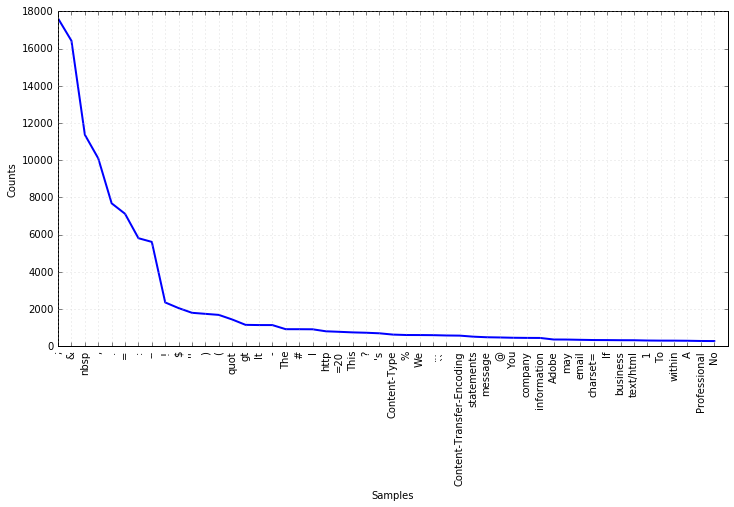

In [24]:
stopwords = stopwords.words('english')
spam = spams.as_matrix(["text"])[:1000]
spam_tokens = [token for sentence in spam
             for token in word_tokenize(re.sub('<[^<]+?>', '', sentence[0])) if token not in stopwords]

plt.figure(figsize=(12,6))
fdist = nltk.FreqDist(spam_tokens)
fdist.plot(50)

In [26]:
hams = data[data["class"] == "ham"]
hams.head()

,class,text
data/easy_ham/1266.52a2bf88987e97b6f4d5a743e353d50a,ham,In message <200210091843.OAA01268@hippolyta.cr...
data/hard_ham/0211.bd3cf04241bf141dff4739b94b29f61c,ham,The following domains that are registered as b...
data/farmer-d/contracts/18,ham,REMINDER:\n\n\n\n\n\nRecords on the August 200...
data/kaminski-v/c_mangmt_group_management/64,ham,"Anne,\n\n\n\nThanks. Shirley is checking my ca..."
data/farmer-d/cleburne_plant____cornhusker_/58,ham,We need to change the demand fees for Tenaska ...


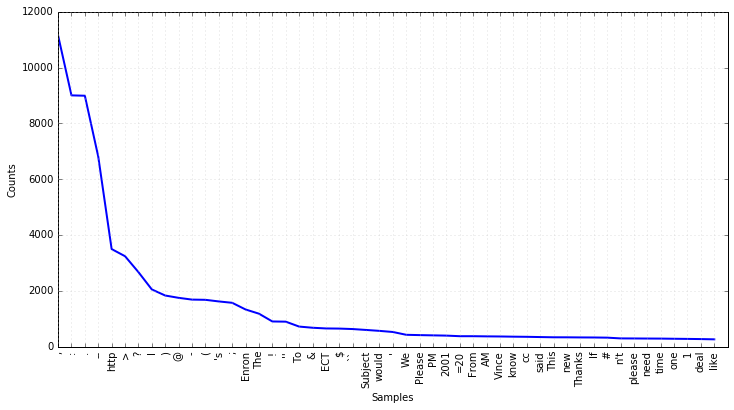

In [25]:
ham = hams.as_matrix(["text"])[:1000]
ham_tokens = [token for sentence in ham
             for token in word_tokenize(re.sub('<[^<]+?>', '', sentence[0])) if token not in stopwords]

plt.figure(figsize=(12,6))
fdist = nltk.FreqDist(ham_tokens)
fdist.plot(50)

## Clasificación

### Naïve Bayes

El clasificador de Naïve Bayes (NB) está basado en el famoso teorema de probabilidad de Bayes. NB es probablemente uno de los algoritmos de aprendizaje automático que se usa más a menudo. Este algoritmo se usa sobre todo en los campos de clasificación de texto y la detección de enfermedades o bioestadística. El algoritmo NB es lineal y es conocido por ser muy eficiente. El adjetivo *naïve* viene de la asunción de que las features son **mutuamente independientes**. Un ejemplo de este comportamiendo es el lanzamiento de una moneda. Aunque las palabras de un texto no suelen cumplir esta asunción el algoritmo suele obtener buenos resultados.

Grandes violaciones en la asunción de independencia de las features o la clasificación de problemas no liniales pueden llevar a un pobre comportamiento del algoritmo. En la práctica siempre se recomienda probar diferentes algoritmos con un mismo dataset para observar posibles problemas. Por otra parte, NB suele detectar correctamente features poco relevantes asignándoles poco peso. Por último, la estructura del modelo no exige una gran cantidad de memoria.

El modelo de probabilidad está formulado de la siguiente manera:

$$\text{Posterior probability} = \cfrac{\text{Conditional Probability X Prior Probability}}{\text{Evidence}}$$

### Árboles de decisión

Los árboles de decisión son un metodo de aprendizaje no paramétrico usado tanto para clasificación como para regresión. El proceso de construcción de un árbol está basado en los conceptos de **ganancia de información y entropía de la información**. Un árbol de decisión es un grafo que describe un modelo de decisión y sus posibles consecuencias. Cada nodo representa un decisión hasta llegar finalmente a las hojas que determinan el resultado de la clasificación.

Una vez que el árbol de decisión se ha creado, se puede realizar una poda. La poda es el proceso por el cual se eliminan nodos que puedan causar ruido a la hora de tomar una decisión. Este proceso se puede comparar con la regularización del SVM o la regresión logística. De esta manera evitamos el *overfitting*

Los árboles de decisión son rápidos tanto en el entrenamiento como en la clasificación, pero son muy sensibles a pequeños cambios en los datos y suelen causar *overfitting*.

#### Maximizar la ganancia de información
Como en cualquier algoritmo de aprendizaje automático, los árboles de decisión necesitan una función objetivo que optimizar. En este caso es la ganancia de información en cada división del árbol. La impuridad del nodo es una métrica de homogeneidad de las clases dentro de un nodo. Los criterios más utilizados en los problemas de clasificación son:
1. Gini index
2. Entropía
3. Error de clasificación

En los problemas de regresión se utiliza la varianza como médida de impuridad.

#### Regla de parada
La construcción de recursiva puede parar según distintos criterios:
1. Se alcanza una determinada profundidad del árbol
2. Ninguna división obtiene una ganancia suficiente de información
3. Ninguna división deja un nodo con suficientes clases de un tipo
4. Las clases son independientes de las features (test chi^2)

### Bagging
"Bootstrap aggregating", también conocidad como *bagging* es una técnica de aprendizaje automático diseñado para mejorar la estabilidad y la precisión de los algoritmos. Su objetivo es reducir la varianza y prevenir el sobreajuste. Aunque es usualmente aplicado a los métodos de árboles de decisión, puede ser usado con cualquier otro tipo de algoritmos. Un tipo de estos algorimos son los *Random forests*.


#### Random Forest
Es un algoritmo tipo *bagging* que utiliza árboles de decisión. Actualmente es el método de moda tanto en problemas de clasificación como de regresión. Los árboles de decisión se entrenan de manera separada y por tanto se puede paralelizar el algoritmo. Al final, se entrenan diferentes árboles y cada uno de ellos emite su predicción. La clase que más votos recibe es el valor de la predicción. En el caso de la regresión se podría emplear la media de las predicciones de cada uno de los arboles.

In [33]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [34]:
classifier = MultinomialNB()
targets = data['class'].values
start_time = time.time()
classifier.fit(counts, targets)
training_time = time.time() - start_time
print("Training time: %.5f seconds" % training_time)

Training time: 0.37401 seconds


In [35]:
examples = ['Free Viagra call today!', "I'm going to attend the Linux users group tomorrow."]
example_counts = count_vectorizer.transform(examples)
start_time = time.time()
predictions = classifier.predict(example_counts)
prediction_time = time.time() - start_time
print("Prediction time: %.5f seconds" % prediction_time)
print(predictions) # [spam ham]

Prediction time: 0.01080 seconds
['spam' 'ham']


##### Más modelos o estimadores...

## Pipelining

In [44]:
from sklearn.cross_validation import KFold
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import train_test_split

In [12]:
pipeline = Pipeline([
        ('vectorizer', CountVectorizer()),
        ('classifier', MultinomialNB())])

start_time = time.time()
pipeline.fit(data['text'].values, data['class'].values)
pipeline_time = time.time() - start_time
print("Elapsed time: %.2f seconds" % pipeline_time)
print(pipeline.predict(examples)) # [spam ham]

Elapsed time: 31.92 seconds
['spam' 'ham']


### Más datos

In [167]:
X_train, X_test, y_train, y_test = train_test_split(
    data['text'].values, data['class'].values, test_size = 0.3, random_state = 42) 

pipeline = Pipeline([
        ('vectorizer', CountVectorizer()),
        ('classifier', MultinomialNB())])

start_time = time.time()
pipeline.fit(X_train, y_train)
pipeline_time = time.time() - start_time
print("Elapsed time: %.4f seconds" % pipeline_time)
predicted = pipeline.predict(X_test)
print(accuracy_score(y_test,predicted)) # [spam ham]

Elapsed time: 30.3732 seconds
0.934573251475


## Cross-Validating

Este método es ampliamente usado pero tiene la desventaja de que no utiliza todo los datos para entrenar el algoritmo.

In [38]:
def cross_validation(k, pipeline):
    k_fold = KFold(n=len(data), n_folds = k)
    scores = []
    confusion = np.array([[0,0], [0, 0]])

    for train_indices, test_indices in k_fold:
        train_text = data.iloc[train_indices]['text'].values
        train_y = data.iloc[train_indices]['class'].values
    
        test_text = data.iloc[test_indices]['text'].values
        test_y = data.iloc[test_indices]['class'].values
    
        pipeline.fit(train_text, train_y)
        predictions = pipeline.predict(test_text)
    
        score = accuracy_score(test_y, predictions)
        scores.append(score)

    return scores

def pretty_print(scores, cross_validation_time):
    print('Total emails classified:', len(data))
    print('Score:', sum(scores)/len(scores))
    print("Cross-Validation time: %4f seconds" % cross_validation_time)

In [39]:
from sklearn.pipeline import Pipeline

k = 2
pipeline = Pipeline([
        ('vectorizer', CountVectorizer()),
        ('classifier', MultinomialNB())])

start_time = time.time()
scores = cross_validation(k, pipeline)
cross_validation_time = time.time() - start_time
pretty_print(scores, cross_validation_time)
# Cross-Validation time: 160.940326 seconds

Total emails classified: 55377
Score: 0.931758705286
Cross-Validation time: 61.752265 seconds


In [164]:
k = 2
pipeline = Pipeline([
    ('count_vectorizer',   CountVectorizer(ngram_range=(1,  2))),
    ('tfidf_transformer',  TfidfTransformer()),
    ('classifier',         MultinomialNB())
])

start_time = time.time()
scores = cross_validation(k, pipeline)
cross_validation_time = time.time() - start_time
pretty_print(scores, cross_validation_time)

Total emails classified: 55377
Score: 0.988605385832
Cross-Validation time: 217.723541 seconds


In [166]:
k = 2
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(ngram_range=(1, 2))),
    ('classifier',  BernoulliNB(binarize=0.0))])

start_time = time.time()
scores = cross_validation(k, pipeline)
cross_validation_time = time.time() - start_time
pretty_print(scores, cross_validation_time)

Total emails classified: 55377
Score: 0.960795987565
Cross-Validation time: 262.477503 seconds


In [42]:
k = 2
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(ngram_range=(1, 2))),
    ('classifier', DecisionTreeClassifier())])

start_time = time.time()
scores = cross_validation(k, pipeline)
cross_validation_time = time.time() - start_time
pretty_print(scores, cross_validation_time)

Total emails classified: 55377
Score: 0.983892221795
Cross-Validation time: 456.822214 seconds


In [43]:
k = 2
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer(ngram_range=(1, 2))),
    ('classifier', RandomForestClassifier())])

start_time = time.time()
scores = cross_validation(k, pipeline)
cross_validation_time = time.time() - start_time
pretty_print(scores, cross_validation_time)

Total emails classified: 55377
Score: 0.974772906787
Cross-Validation time: 278.959522 seconds


## Evaluación

#### Métodos numéricos
* Accuracy
* Expected benefit/cost
* Precision
* Recall
* Area under a performance curve
* ...

#### Métodos gráficos
* ROC Curves
* Precision-Recall Curves
* DET curves
* Regret graphs
* Loss difference plots
* Skill plots
* ...

#### TP Rate
$$\text{TP Rate} = \cfrac{\text{True Positives}}{\text{Positives}}$$

#### FN Rate
$$\text{FP Rate} = \cfrac{\text{False Negatives}}{\text{Positives}}$$

#### FP Rate
$$\text{FP Rate} = \cfrac{\text{False Positives}}{\text{Negatives}}$$

#### TN Rate
$$\text{TN Rate} = \cfrac{\text{True Negatives}}{\text{Negatives}}$$

#### Accuracy
$$\text{Accuracy} = \cfrac{\text{True Positives + True Negatives }}{\text{Postives + Negatives}}$$

#### Precision

$$\text{Precision} = \cfrac{\text{True Positives}}{\text{True Positives / False Positives}}$$

#### Recall

$$\text{Recall} = \cfrac{\text{True Positives}}{\text{True Positives / False Negatives}}$$

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    data['text'].values, data['class'].values, test_size = 0.3, random_state = 42) 

naive_bayes = Pipeline([
        ('vectorizer', CountVectorizer()),
        ('classifier', MultinomialNB())])

decision_tree = Pipeline([
        ('vectorizer', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())])

random_forests = Pipeline([
        ('vectorizer', CountVectorizer()),
        ('classifier', RandomForestClassifier())])

In [56]:
start_time = time.time()
naive_bayes.fit(X_train, y_train)
pipeline_time = time.time() - start_time
print("Naive Bayes Training time: %.4f seconds" % pipeline_time)
start_time = time.time()
decision_tree.fit(X_train, y_train)
pipeline_time = time.time() - start_time
print("Decision Tree Training time: %.4f seconds" % pipeline_time)
start_time = time.time()
random_forests.fit(X_train, y_train)
pipeline_time = time.time() - start_time
print("Random Forests Training time: %.4f seconds" % pipeline_time)

Naive Bayes Training time: 28.0896 seconds
Decision Tree Training time: 70.1362 seconds
Random Forests Training time: 51.2961 seconds


In [60]:
print(classification_report(y_test, naive_bayes.predict(X_test)))
print("="*60)
print(classification_report(y_test, decision_tree.predict(X_test)))
print("="*60)
print(classification_report(y_test, random_forests.predict(X_test)))

             precision    recall  f1-score   support

        ham       0.86      0.99      0.92      6561
       spam       0.99      0.90      0.94     10053

avg / total       0.94      0.94      0.94     16614

             precision    recall  f1-score   support

        ham       0.99      0.98      0.98      6561
       spam       0.99      0.99      0.99     10053

avg / total       0.99      0.99      0.99     16614

             precision    recall  f1-score   support

        ham       0.97      0.99      0.98      6561
       spam       0.99      0.98      0.99     10053

avg / total       0.98      0.98      0.98     16614



### Confusion Matrices

In [37]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

In [155]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ["ham", "spam"], rotation=45)
    plt.yticks(tick_marks, ["ham", "spam"])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    for i,j in ((x,y) for x in range(len(cm[1])) for y in range(len(cm[0]))):
            ax.annotate(str("{0:d}".format(cm[j][i])), xy=(i,j), color='black', size = 12)

Naive Bayes Training time: 22.6311 seconds
Decision Tree Training time: 58.3268 seconds
Random Forests Training time: 47.9221 seconds


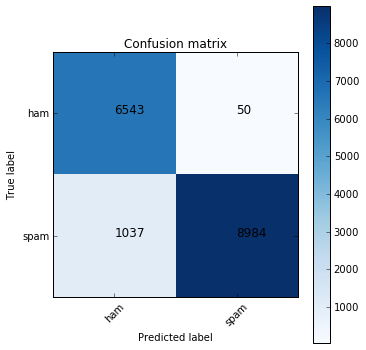

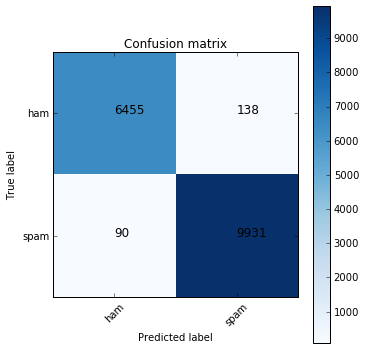

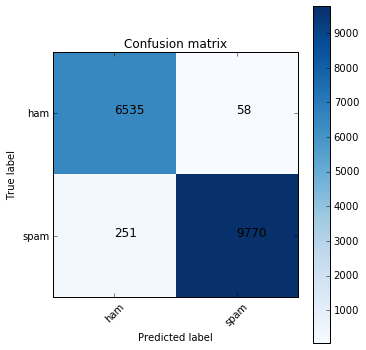

In [165]:
plot_confusion_matrix(confusion_matrix(y_test, naive_bayes.predict(X_test)))
plot_confusion_matrix(confusion_matrix(y_test, decision_tree.predict(X_test)))
plot_confusion_matrix(confusion_matrix(y_test, random_forests.predict(X_test)))

### ROC Curve & Area under the curve (AUC)

In [148]:
def draw_ROC_curves(ROC_curves):
    plt.figure(figsize=(8,6))
    for rc in ROC_curves:
        fpr, tpr, thresholds = rc[1]
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='%s (area = %0.5f)' % (rc[0], roc_auc))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([-0.1, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate (Recall)')
        plt.title('Receiver operating characteristic %s' % rc[0])
        plt.legend(loc="lower right")

In [172]:
y_test[y_test == "ham"] = 0
y_test[y_test == "spam"] = 1

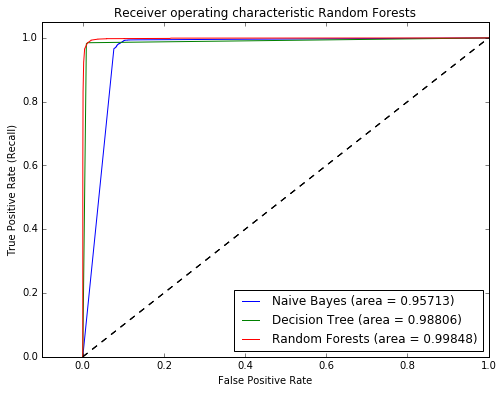

In [157]:
draw_ROC_curves([("Naive Bayes", roc_curve(y_test, naive_bayes.predict_proba(X_test)[::,0], pos_label = 0)),
                ("Decision Tree", roc_curve(y_test, decision_tree.predict_proba(X_test)[::,0], pos_label = 0)),
                ("Random Forests", roc_curve(y_test, random_forests.predict_proba(X_test)[::,0], pos_label = 0))])

### Precision-Recall Curve

In [174]:
def draw_precisionRecall_curves(precisionRecall_curves):
    plt.figure(figsize=(8,6))
    for rc in precisionRecall_curves:
        precision, recall, thresholds = rc[1]
        plt.plot(recall, precision, label='%s'% rc[0])
        plt.xlim([0.0, 1.01])
        plt.plot([1, 0], [1, 0], 'k--')
        plt.ylim([0.0, 1.01])
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision Recall Curve' )
        plt.legend(loc="lower left")

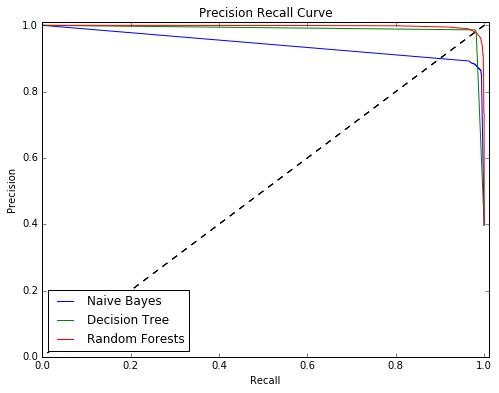

In [175]:
draw_precisionRecall_curves([("Naive Bayes", precision_recall_curve(y_test, naive_bayes.predict_proba(X_test)[::,0], pos_label = 0)),
                ("Decision Tree", precision_recall_curve(y_test, decision_tree.predict_proba(X_test)[::,0], pos_label = 0)),
                ("Random Forests", precision_recall_curve(y_test, random_forests.predict_proba(X_test)[::,0], pos_label = 0))])

# De propina...

In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV

In [53]:
pipe_nb = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('select', SelectKBest(chi2)),
                    ('clf', MultinomialNB())])

param_grid = [{ 'vect__ngram_range': [(1, 1), (1, 2)],
                'tfidf__use_idf': (True, False),
                'select__k': ['all', 20]
              }]


cross_validation = StratifiedKFold(y_train, n_folds=2)

gs_nb = GridSearchCV(estimator=pipe_nb,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=cross_validation,
                 n_jobs=1)

gs_nb.fit(X_train, y_train)
nb = gs_nb.best_estimator_
nb

Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...unction chi2 at 0x109292598>)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

## Entorno utilizado

In [21]:
%install_ext https://raw.githubusercontent.com/rasbt/watermark/master/watermark.py

Installed watermark.py. To use it, type:
  %load_ext watermark


/Users/b3j90/anaconda/envs/kampal/lib/python3.5/site-packages/IPython/core/magics/extension.py:47: UserWarning: %install_ext` is deprecated, please distribute your extension(s)as a python packages.
  "as a python packages.", UserWarning)


In [20]:
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [19]:
%watermark -a 'Borja A. Espejo' -nmv --packages numpy,pandas,scikit-learn,matplotlib,Seaborn

Borja Espejo Sun Dec 20 2015 

CPython 3.5.1
IPython 4.0.1

numpy 1.10.2
pandas 0.17.1
scikit-learn 0.17
matplotlib 1.5.0
Seaborn 0.6.0

compiler   : GCC 4.2.1 (Apple Inc. build 5577)
system     : Darwin
release    : 12.5.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit
